In [30]:
import graphlab
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
sales = graphlab.SFrame('/home/ramak/kc_house_data.gl/')
sales = sales.sort(['sqft_living','price'])

In [39]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1']=feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_sframe[name] to be feature^power
            poly_sframe[name]= feature ** power
    return poly_sframe

In [56]:
poly1_data = polynomial_sframe(sales['sqft_living'], 1)
poly1_data['price'] = sales['price']


poly2_data = polynomial_sframe(sales['sqft_living'], 2)
poly2_data['price'] = sales['price']

poly3_data = polynomial_sframe(sales['sqft_living'], 3)
poly3_data['price'] = sales['price']
poly15_data = polynomial_sframe(sales['sqft_living'], 15)
poly15_data['price'] = sales['price']


<class 'graphlab.data_structures.sarray.SArray'>
<class 'graphlab.data_structures.sarray.SArray'>
<class 'graphlab.data_structures.sarray.SArray'>
<class 'graphlab.data_structures.sarray.SArray'>


In [59]:
print poly15_data

+---------+----------+------------+---------------+-------------------+
| power_1 | power_2  |  power_3   |    power_4    |      power_5      |
+---------+----------+------------+---------------+-------------------+
|  290.0  | 84100.0  | 24389000.0 |  7072810000.0 |   2.0511149e+12   |
|  370.0  | 136900.0 | 50653000.0 | 18741610000.0 |   6.9343957e+12   |
|  380.0  | 144400.0 | 54872000.0 | 20851360000.0 |   7.9235168e+12   |
|  384.0  | 147456.0 | 56623104.0 | 21743271936.0 | 8.34941642342e+12 |
|  390.0  | 152100.0 | 59319000.0 | 23134410000.0 |   9.0224199e+12   |
|  390.0  | 152100.0 | 59319000.0 | 23134410000.0 |   9.0224199e+12   |
|  410.0  | 168100.0 | 68921000.0 | 28257610000.0 |   1.15856201e+13  |
|  420.0  | 176400.0 | 74088000.0 | 31116960000.0 |   1.30691232e+13  |
|  420.0  | 176400.0 | 74088000.0 | 31116960000.0 |   1.30691232e+13  |
|  430.0  | 184900.0 | 79507000.0 | 34188010000.0 |   1.47008443e+13  |
+---------+----------+------------+---------------+-------------

In [60]:
 
model2 = graphlab.linear_regression.create(poly2_data, target = 'price', features = ['power_2'], validation_set = None)
model3 = graphlab.linear_regression.create(poly3_data, target = 'price', features = ['power_3'], validation_set = None)
model15 = graphlab.linear_regression.create(poly15_data, target = 'price', features = ['power_15'], validation_set = None)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.009286     | 6624758.672523     | 366503.484839 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

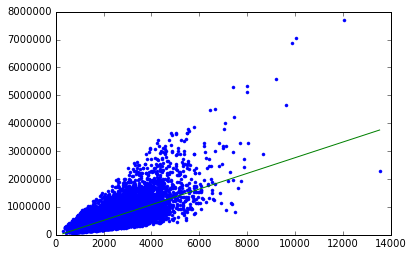

In [45]:
plt.plot(poly1_data['power_1'],poly1_data['price'],'.',
poly1_data['power_1'], model1.predict(poly1_data),'-')

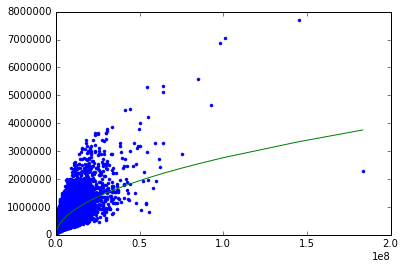

In [52]:
plt.plot(poly2_data['power_2'],poly1_data['price'],'.',
poly2_data['power_2'], model1.predict(poly2_data),'-')

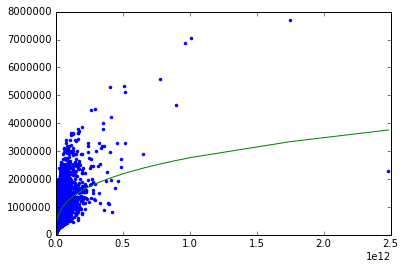

In [53]:
plt.plot(poly3_data['power_3'],poly3_data['price'],'.',
poly3_data['power_3'], model1.predict(poly3_data),'-')

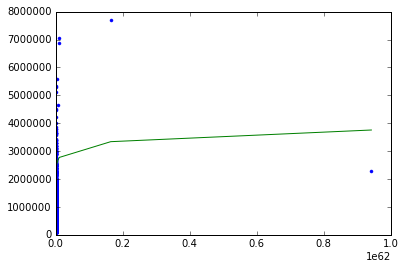

In [62]:
plt.plot(poly15_data['power_15'],poly15_data['price'],'.',
poly15_data['power_15'], model1.predict(poly15_data),'-')

In [63]:
print model1['coefficients']

+-------------+-------+----------------+---------------+
|     name    | index |     value      |     stderr    |
+-------------+-------+----------------+---------------+
| (intercept) |  None | -43579.0852515 | 4402.68969743 |
|   power_1   |  None | 280.622770886  | 1.93639855513 |
+-------------+-------+----------------+---------------+
[2 rows x 4 columns]



In [64]:
print model2['coefficients']

+-------------+-------+-----------------+-------------------+
|     name    | index |      value      |       stderr      |
+-------------+-------+-----------------+-------------------+
| (intercept) |  None |  284745.681219  |   2370.80296665   |
|   power_2   |  None | 0.0493942487341 | 0.000316938865473 |
+-------------+-------+-----------------+-------------------+
[2 rows x 4 columns]



In [65]:
print model3['coefficients']

+-------------+-------+-------------------+-------------------+
|     name    | index |       value       |       stderr      |
+-------------+-------+-------------------+-------------------+
| (intercept) |  None |   443140.115004   |    2127.4718487   |
|   power_3   |  None | 6.29505168454e-06 | 5.40713558099e-08 |
+-------------+-------+-------------------+-------------------+
[2 rows x 4 columns]



In [66]:
print model15['coefficients']

+-------------+-------+-------------------+-------------------+
|     name    | index |       value       |       stderr      |
+-------------+-------+-------------------+-------------------+
| (intercept) |  None |   539916.011822   |   2493.18744516   |
|   power_15  |  None | 3.26446546166e-56 | 3.83091283692e-57 |
+-------------+-------+-------------------+-------------------+
[2 rows x 4 columns]



In [76]:
training_and_validation,testing=sales.random_split(0.9,seed=1)
training,validation=training_and_validation.random_split(0.5,seed=1)
set1,set2=training.random_split(0.5,seed=0)
set3,set4=validation.random_split(0.5,seed=0)
set3.show()


Canvas is updated and available in a tab in the default browser.


In [70]:
model1.training_rmse


261440.7907236988

In [74]:
for counter in range(1,15,1):
    power="power_" + str(counter)
    model="model" + str(counter)
    model=graphlab.linear_regression.create(poly15_data, target = 'price', features = [power], validation_set = None,verbose=False)
    print model.training_rmse



261440.790724
251906.559279
287798.942957
331732.875402
352307.271448
359921.436152
362982.336784
364415.17078
365185.70587
365647.568085
365947.797541
366155.110071
366304.948841
366417.131086
